NEURAL NETWORK PERFOMANCE INVESTIGATION

In [90]:
#importing stuff needed, including tensorflow
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense

In [91]:
#First of all let`s generate the data we`ll work with
# number of data
N=4000
# size of each sample
L=2
# box size
B=100

#generating a folder to keep our data
!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


In [92]:
# a nonlinear classifier function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r

#define function to create data
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

In [93]:
TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

2 5 1


In [94]:
#generating the data for the default dataset
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)

#let`s generate the files to store the first default dataset and its labels
np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")



#generating the data for the second (reduced) dataset
N=3000
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
#let`s generate the file to store the second dataset and its labels
np.savetxt(filename("data(reduced)",TYPE),x)
np.savetxt(filename("labels(reduced)",TYPE),y,fmt="%d")




#generating the data for the third (increased) dataset
N=10000
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
#let`s generate the file to store the third dataset (increased) and its labels
np.savetxt(filename("data(increased)",TYPE),x)
np.savetxt(filename("labels(increased)",TYPE),y,fmt="%d")




#generating the data for the forth (augmented) dataset
N=4000
x,y = (np.random.random((N,2))-0.5)*B+np.random.random((N,2)), np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)

#let`s generate the file to store the forth dataset (augmented) and its labels
np.savetxt(filename("data(augmented)",TYPE),x)
np.savetxt(filename("labels(augmented)",TYPE),y,fmt="%d")

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0


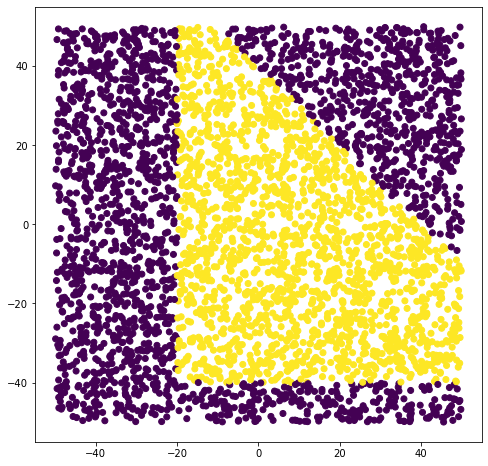

In [95]:
#Now let's load the first dataset to start its analysis
TYPE=1
x = np.loadtxt(filename("data",TYPE),delimiter=' ')
y = np.loadtxt(filename("labels",TYPE),delimiter=' ')
N=len(x)

#plot the labeled data
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

In [96]:
#Now let's built two options for neural networks (two different kinds of architectures)

#reproducibility
np.random.seed(204048)

#Let's set a function to divide data from a specific file in training and test set
def split_data(filename_for_data, filename_for_label, k=0.8):
    x = np.loadtxt(filename(filename_for_data,TYPE),delimiter=' ')
    y = np.loadtxt(filename(filename_for_label,TYPE),delimiter=' ')
    N=len(x)
    k=0.8
    N_train = int(k*N)
    # train validation split
    (x_train,y_train) = (x[:N_train],y[:N_train])
    (x_valid,y_valid) = (x[N_train:],y[N_train:])
    # rescaling
    def Rescale(x):
        return (x-x.mean())/np.sqrt(x.var())

    x_train = Rescale(x_train)
    x_valid = Rescale(x_valid)
    return x, y, x_train, x_valid, y_train, y_valid

dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
        # RESCALE
        grid_r = grid/50


def train_and_plot(filename_for_data, filename_for_labels, k=0.8, epoch=400):
    x,y, x_train, x_valid, y_train, y_valid = split_data(filename_for_data,filename_for_labels)
    nepoch=epoch
    for CASE in range(1,3):
        print(CASE)
        if CASE==1:
            model1 = Sequential()
            model1.add(Dense(L,input_shape=(L,),activation='relu')) #input layer
            model1.add(Dense(20,activation='relu')) #first layer
            model1.add(Dense(20,activation='relu')) #second layer
            model1.add(Dense(1,activation='sigmoid')) # final output    
            
            model1.compile(loss='binary_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])
            history1=model1.fit(x_train,y_train, epochs=nepoch,batch_size = 50,
                validation_data=(x_valid,y_valid),verbose=0)
            y_pred1 = model1.predict(grid_r)
            f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
            ax1.scatter(grid[:,1], grid[:,0],c=y_pred1)
            ax1.title.set_text('CASE 1') 

            
        if CASE==2:
            model2 = Sequential()
            model2.add(Dense(L,input_shape=(L,),activation='sigmoid')) #input layer
            model2.add(Dense(3,activation='sigmoid'))
            model2.add(Dense(1,activation='sigmoid'))

            model2.compile(loss='binary_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])
            history2=model2.fit(x_train,y_train, epochs=nepoch,batch_size = 50,
                validation_data=(x_valid,y_valid),verbose=0)
            y_pred2 = model2.predict(grid_r)

            ax2.scatter(grid[:,0],grid[:,1],c=y_pred2)
            ax2.title.set_text('CASE 2')
    return model1, model2, history1, history2, x_valid, y_valid



In [97]:
def analysis(model, history, X_test, Y_test, title):
    score = model.evaluate(X_test, Y_test, verbose=0)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # look into training history

    # summarize history for accuracy
    
    fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(14,6))
    fig.title(title)
    ax_1.plot(history.history['accuracy'])
    ax_1.plot(history.history['val_accuracy'])
    ax_1.set(ylabel='model accuracy', xlabel='epoch')
    ax_1.legend(['train', 'test'], loc='best')

    # summarize history for loss
    ax_2.plot(history.history['loss'])
    ax_2.plot(history.history['val_loss'])
    ax_2.set(ylabel='model loss', xlabel='epoch')
    plt.legend(['train', 'test'], loc='best')

    return

1
2


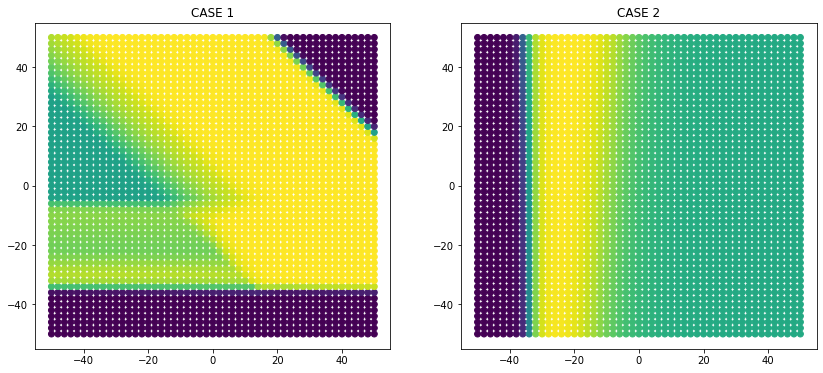

In [98]:
model1, model2, history1, history2, X_test, Y_test = train_and_plot("data", "labels", k=0.8)



Test loss: 0.14881868660449982
Test accuracy: 0.925000011920929


AttributeError: 'Figure' object has no attribute 'title'

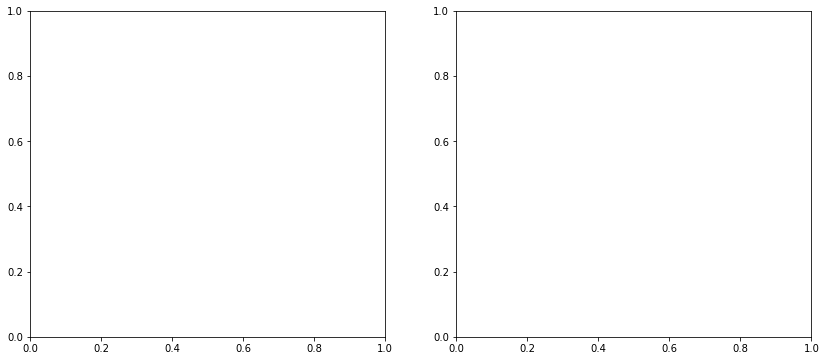

In [99]:
title1="Model accuracy and loss for Case 1"
title2="Model accuracy and loss for Case 2"
analysis(model1, history1, X_test, Y_test, title1)
analysis(model2, history2, X_test, Y_test, title2)

1
2


KeyboardInterrupt: 

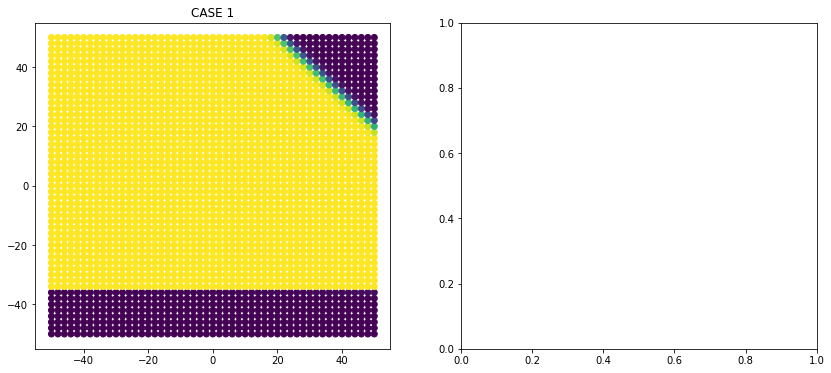

In [ ]:
model1, model2, history1, history2, X_test, Y_test = train_and_plot("data(reduced)", "labels(reduced)", k=0.8)
title1="Model accuracy and loss for Case 1 and reduced dataset "
title2="Model accuracy and loss for Case 2 and reduced dataset"
analysis(model1, history1, X_test, Y_test, title1)
analysis(model2, history2,  X_test, Y_test, title2)

1
2

Test loss: 0.041410546749830246
Test accuracy: 0.984499990940094

Test loss: 0.23447753489017487
Test accuracy: 0.9204999804496765


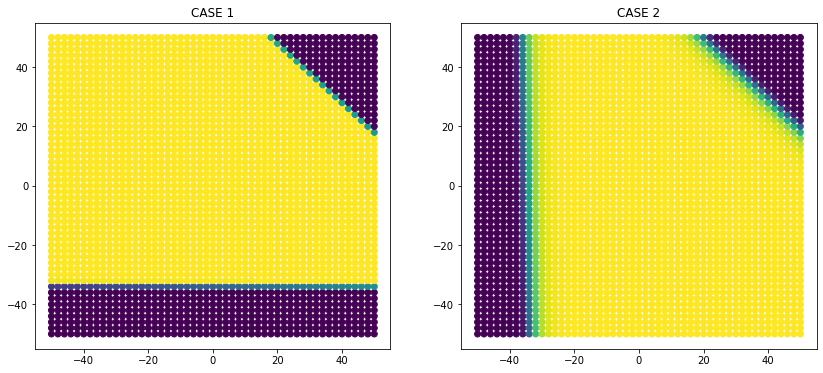

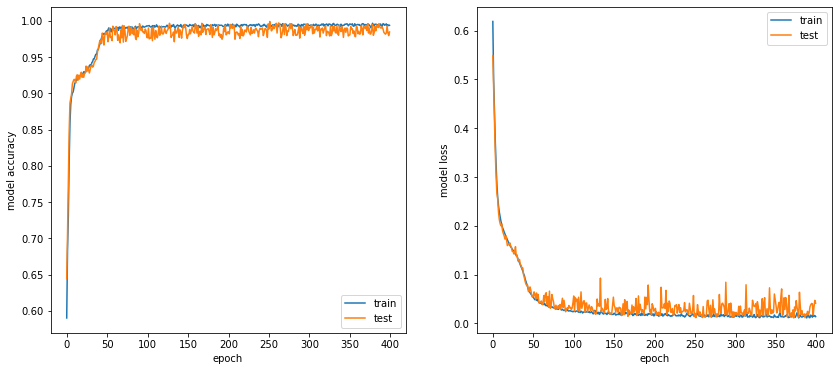

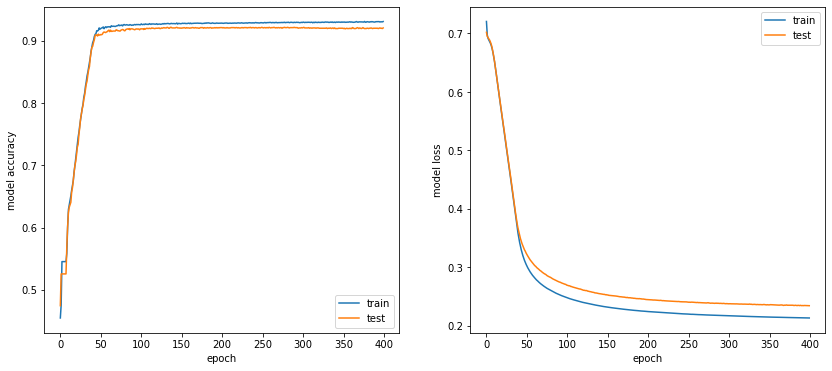

In [ ]:
model1, model2, history1, history2, X_test, Y_test = train_and_plot("data(increased)", "labels(increased)", k=0.8)
title1="Model accuracy and loss for Case 1 and increased dataset "
title2="Model accuracy and loss for Case 2 and increased dataset"
analysis(model1, history1, X_test, Y_test, title1)
analysis(model2, history2,  X_test, Y_test, title2)

1
2

Test loss: 0.055034294724464417
Test accuracy: 0.9775000214576721

Test loss: 0.24526160955429077
Test accuracy: 0.9125000238418579


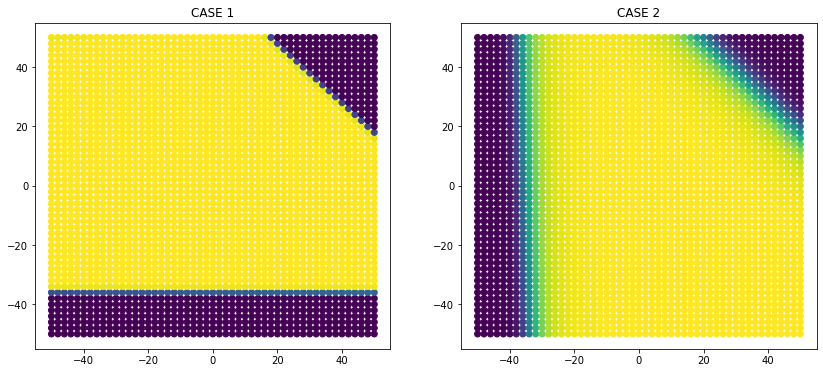

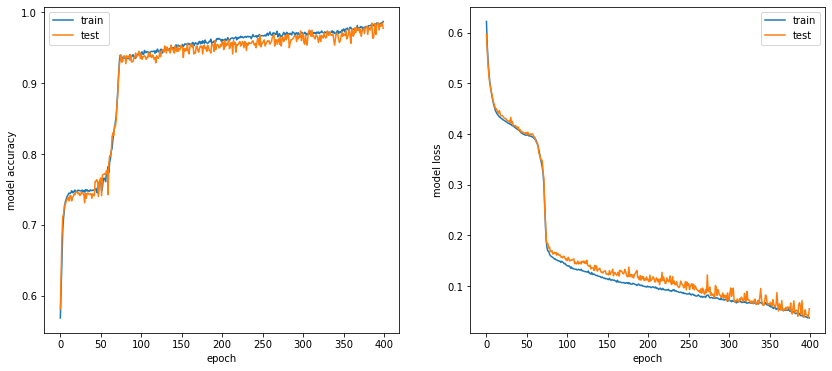

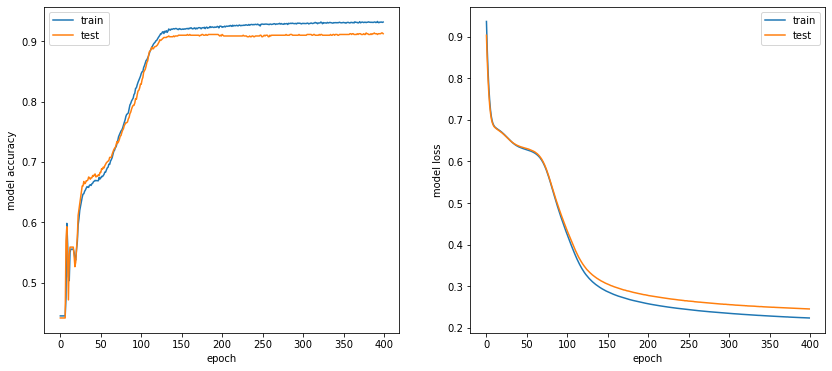

In [ ]:
model1, model2, history1, history2, X_test, Y_test = train_and_plot("data(augmented)", "labels(augmented)", k=0.8)
title1="Model accuracy and loss for Case 1 and augmented dataset "
title2="Model accuracy and loss for Case 2 and augmented dataset"
analysis(model1, history1, X_test, Y_test, title1)
analysis(model2, history2,  X_test, Y_test, title2)